In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df=pd.read_csv("C:/Users/KRITH/OneDrive/Documents/website/AI project/amazon_sentiment analsysis_python project/amazon_reviews.csv")
print(df)

      Unnamed: 0  reviewerName  overall  \
0              0           NaN      4.0   
1              1          0mie      5.0   
2              2           1K3      4.0   
3              3           1m2      5.0   
4              4  2&amp;1/2Men      5.0   
...          ...           ...      ...   
4910        4910        ZM "J"      1.0   
4911        4911            Zo      5.0   
4912        4912     Z S Liske      5.0   
4913        4913      Z Taylor      5.0   
4914        4914           Zza      5.0   

                                             reviewText  reviewTime  day_diff  \
0                                            No issues.  2014-07-23       138   
1     Purchased this for my device, it worked as adv...  2013-10-25       409   
2     it works as expected. I should have sprung for...  2012-12-23       715   
3     This think has worked out great.Had a diff. br...  2013-11-21       382   
4     Bought it with Retail Packaging, arrived legit...  2013-07-13       513 

In [4]:
#First 5 values
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [5]:
#Last few values
df.tail()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0
4914,4914,Zza,5.0,I've heard bad things about this 64gb Micro SD...,2014-02-01,310,0,0,0,0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [7]:
df.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [8]:
df.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [9]:
df.count()

Unnamed: 0              4915
reviewerName            4914
overall                 4915
reviewText              4914
reviewTime              4915
day_diff                4915
helpful_yes             4915
helpful_no              4915
total_vote              4915
score_pos_neg_diff      4915
score_average_rating    4915
wilson_lower_bound      4915
dtype: int64

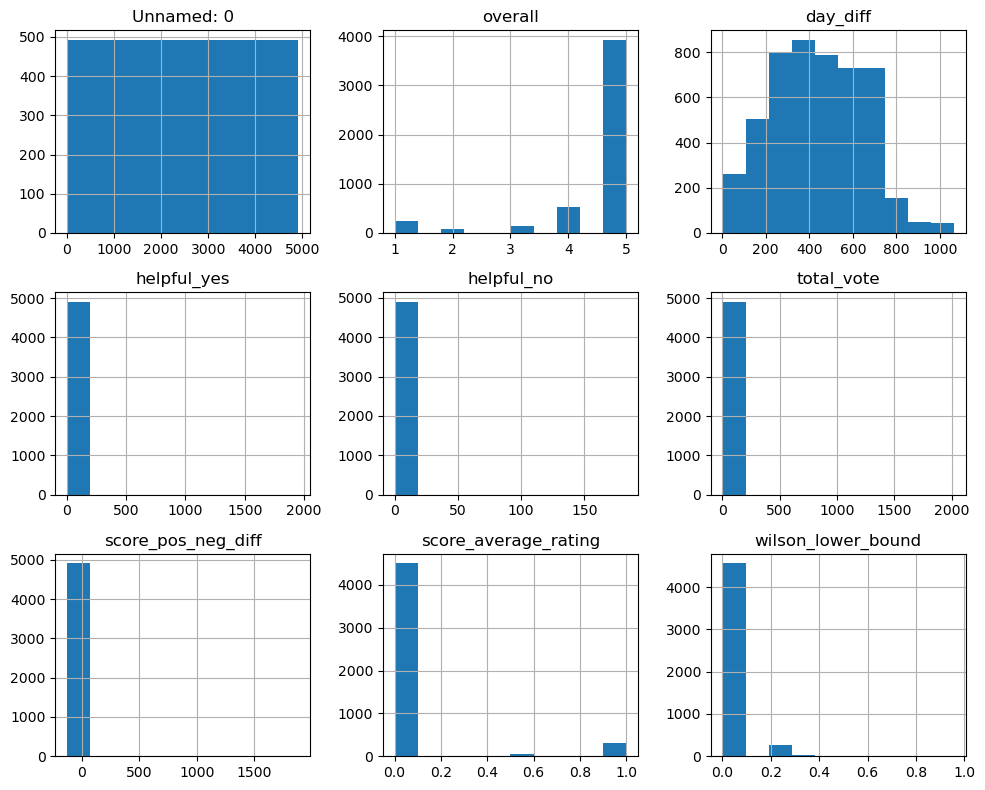

In [10]:
import matplotlib.pyplot as plt 

df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

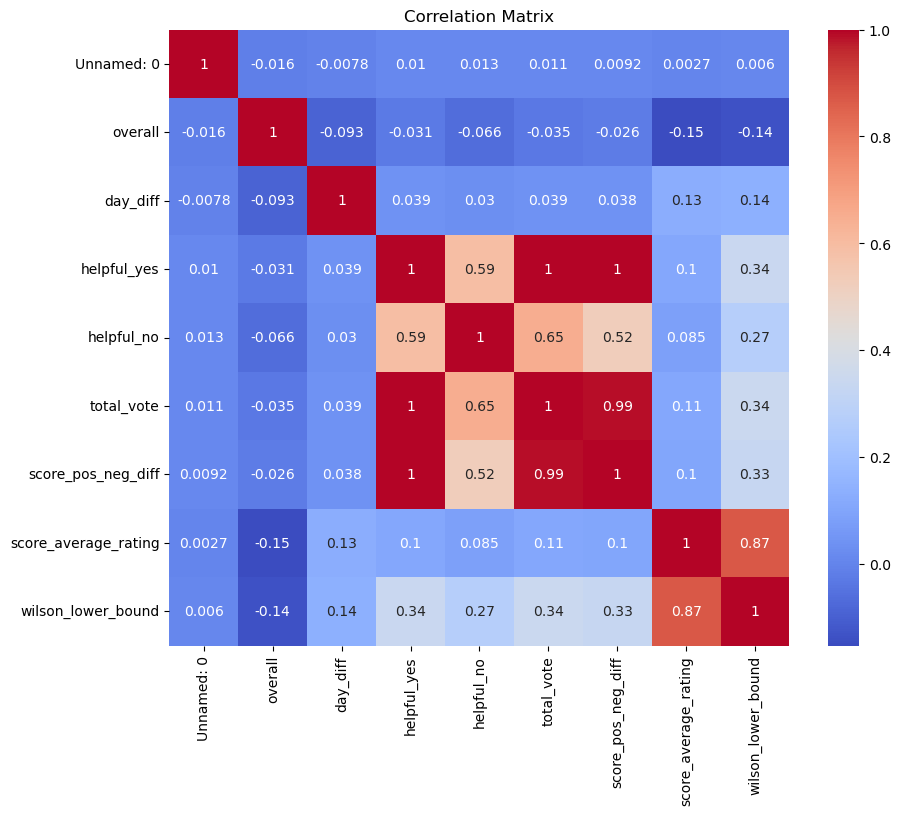

In [11]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = df.select_dtypes(include=['number']).corr()


correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

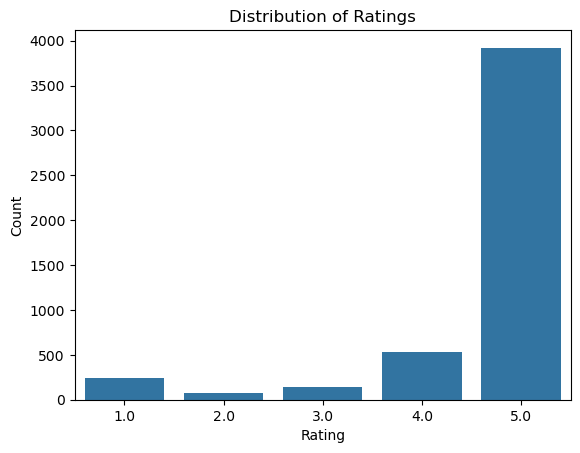

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.countplot(data=df, x='overall')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

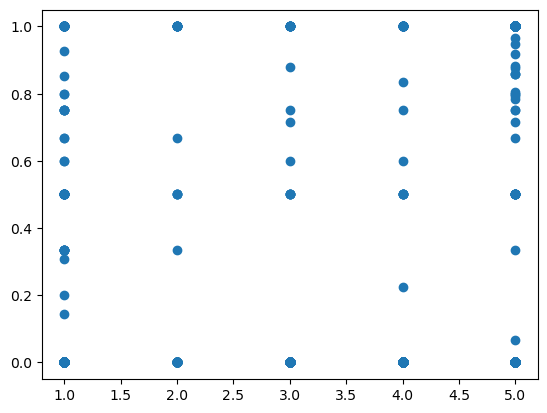

In [13]:
import matplotlib.pyplot as plt 

plt.scatter(df['overall'], df['score_average_rating'])
plt.show()

In [14]:
!pip install textblob

In [17]:
!pip install textblob tqdm

from textblob import TextBlob
from tqdm.auto import tqdm
import pandas as pd

tqdm.pandas()

def get_sentiment(text):
    text = "" if pd.isna(text) else str(text)
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df["reviewText"] = df["reviewText"].fillna("").astype(str)
df["sentiment"] = df["reviewText"].progress_apply(get_sentiment)

print("Done ✔")


  0%|          | 0/4915 [00:00<?, ?it/s]

Done ✔


In [19]:
df[["reviewText", "sentiment"]].head()


,reviewText,sentiment
0,No issues.,Neutral
1,"Purchased this for my device, it worked as adv...",Positive
2,it works as expected. I should have sprung for...,Positive
3,This think has worked out great.Had a diff. br...,Neutral
4,"Bought it with Retail Packaging, arrived legit...",Positive


In [20]:
df[["reviewText", "sentiment"]].count()


reviewText    4915
sentiment     4915
dtype: int64

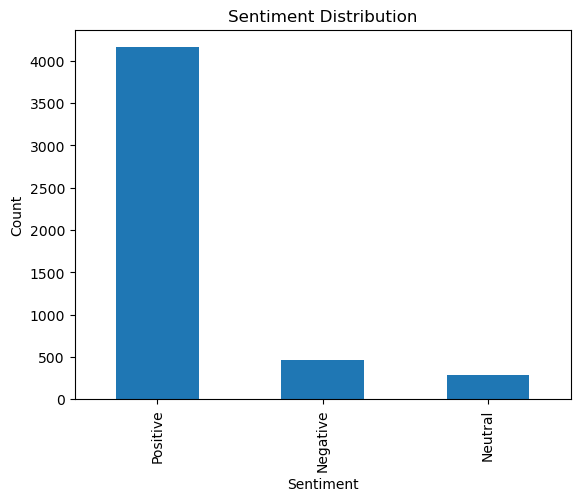

In [18]:
import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [25]:
from textblob import TextBlob
import re

# Take input
raw_text = input("Enter text: ")

# Remove NON-PRINTABLE characters
text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', raw_text)

blob = TextBlob(text)

polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity
objectivity = 1 - subjectivity

print("Cleaned Text:", text)
print("Polarity:", polarity)
print("Subjectivity:", subjectivity)
print("Objectivity:", objectivity)

Enter text:  very durable and consumed less electricity and cost effective 


Cleaned Text: very durable and consumed less electricity and cost effective 
Polarity: 0.2111111111111111
Subjectivity: 0.3888888888888889
Objectivity: 0.6111111111111112


In [38]:
from textblob import TextBlob

# Function for sentiment label
def polarity_label(p):
    if p > 0.2:
        return "Positive"
    elif p < -0.2:
        return "Negative"
    else:
        return "Neutral"

# Function for objectivity label
def objectivity_label(o):
    if o >= 0.7:
        return "Highly Objective"
    elif o >= 0.4:
        return "Moderately Objective"
    else:
        return "Subjective / Opinionated"

# Take input from user
text = input("Enter your review: ")

# Create TextBlob object
blob = TextBlob(text)

# Calculate values
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity
objectivity = 1 - subjectivity

# Labels
sentiment = polarity_label(polarity)
obj_label = objectivity_label(objectivity)

# Print results
print("\n--- Analysis ---")
print("Text:", text)
print("Polarity:", polarity)
print("Subjectivity:", subjectivity)
print("Objectivity:", objectivity)
print("Sentiment Label:", sentiment)
print("Objectivity Label:", obj_label)

Enter your review:  very nice product.....im so happy .....best



--- Analysis ---
Text: very nice product.....im so happy .....best
Polarity: 0.79
Subjectivity: 1.0
Objectivity: 0.0
Sentiment Label: Positive
Objectivity Label: Subjective / Opinionated
